In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankitkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
url_dataset_path = 'URL.csv'
url_df = pd.read_csv(url_dataset_path)

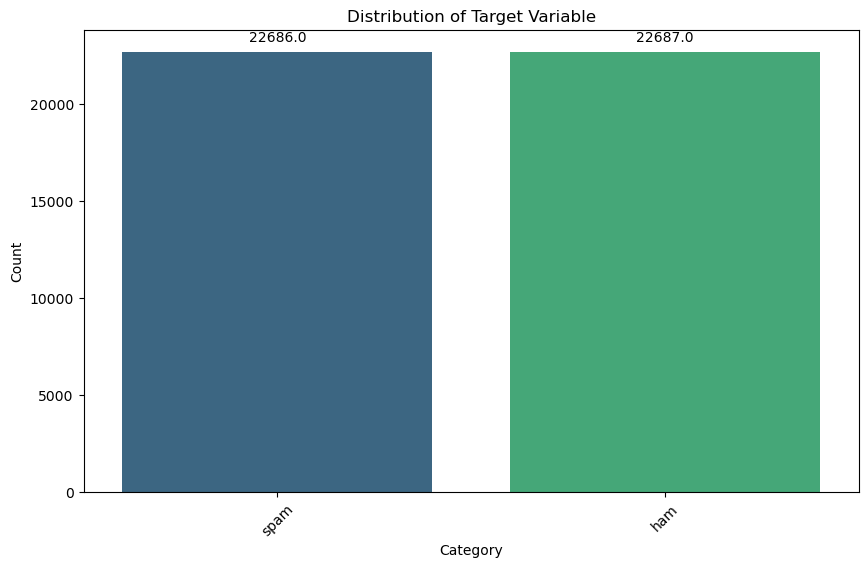

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the distribution of the target variable
target = url_df['Category']

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=target, palette='viridis')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Target Variable')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/pk/xy162xfd5l13hxj42cjsrfvm0000gn/T/ipykernel_1181/1033030613.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(category_counts)).colors


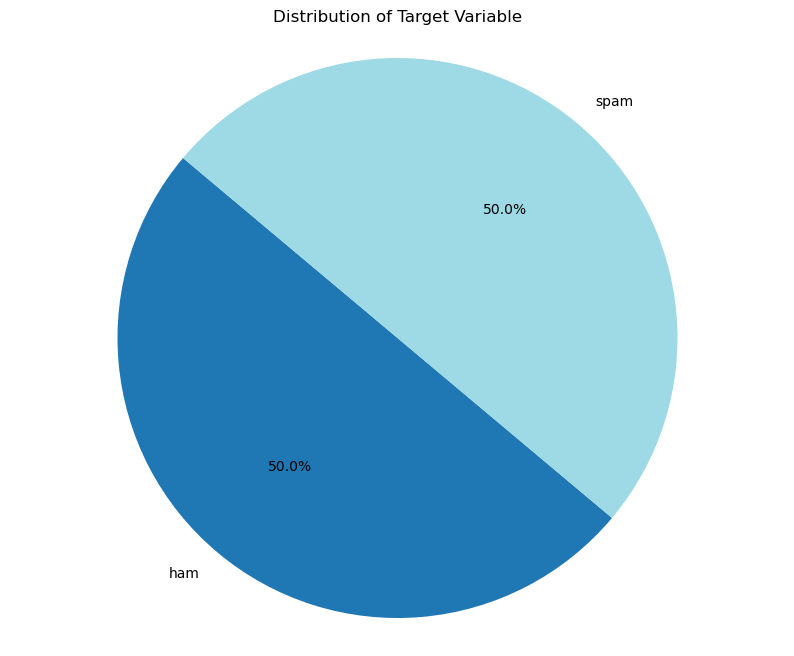

In [8]:
target = url_df['Category']

# Count the occurrences of each category
category_counts = target.value_counts()

# Define a list of colors for the pie chart
colors = plt.cm.get_cmap('tab20', len(category_counts)).colors

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Target Variable')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [25]:
url_df.head()

,Category,Data
0,spam,logtelstra2021.ddnsking.com/0dfa1b53b835500696...
1,spam,dvsber.ru/modules/mod_ariimageslidersa/KRENK3N...
2,spam,kimsinc564.000webhostapp.com/notification.php?...
3,spam,benjim.com/all
4,spam,www.m.micesrunescape.com-we.ru/


In [5]:
url_df.tail()

,Category,Data
45368,spam,sa.www4-irs-gov.israttstech.com/dl6/pre_qualif...
45369,spam,jk3bt83s.r.eu-west-1.awstrack.me/L0/https:%2F%...
45370,spam,azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwsspcb6u91a...
45371,spam,www.aimazan.co-jp.fiyezswl.love/
45372,ham,en.wikipedia.org/wiki/Facebook


In [20]:
class TokenizerUtility:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()

    def tokenize_and_stem(self, text):
        tokens = word_tokenize(text)
        tokens = [self.stemmer.stem(token) for token in tokens if token.isalnum()]
        tokens = [token for token in tokens if token not in self.stop_words]
        return tokens


In [21]:
url_X = url_df['Data'].astype(str)
from sklearn.preprocessing import LabelEncoder

y = url_df['Category']

In [22]:
url_X_train, url_X_test, y_train, y_test = train_test_split(
    url_X, y, test_size=0.2, random_state=42
)

In [23]:
tokenizer_utility = TokenizerUtility()

# Use TF-IDF vectorization with custom tokenizer for URL
url_tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer_utility.tokenize_and_stem, max_features=5000)
url_X_train_tfidf = url_tfidf_vectorizer.fit_transform(url_X_train)
url_X_test_tfidf = url_tfidf_vectorizer.transform(url_X_test)
print(url_X_test_tfidf.todense())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from time import time

# Assuming X_train_tfidf is your TF-IDF vectorized training data and y_train are class labels

# Start recording training time
train_start_time = time()

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(url_X_train_tfidf, y_train)

# End recording training time
train_end_time = time()

# Calculate training time
training_time = train_end_time - train_start_time
print(f"Training Time: {training_time:.2f} seconds")

# Start recording testing time
test_start_time = time()

# Make predictions on the test set (assuming you have X_test_tfidf)
y_pred = rf_classifier.predict(url_X_test_tfidf)

# End recording testing time
test_end_time = time()

# Calculate testing time
testing_time = test_end_time - test_start_time
print(f"Testing Time: {testing_time:.2f} seconds")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate overall precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Training Time: 3.32 seconds
Testing Time: 0.49 seconds

Overall Evaluation:
Precision (Micro): 0.5312
Recall (Micro): 0.5312
F1-Score (Micro): 0.5312
False Positive Rate (FPR): 0.4688
Accuracy: 0.5312


In [33]:
y_pred = rf_classifier.predict(url_X_test_tfidf)
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of random classifier: {accuracy:.2f}")

Accuracy of random classifier: 0.53


In [8]:
start_time = time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(url_X_train_tfidf, y_train)
end_time = time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
# Make predictions on the test set using Decision Tree
test_start_time = time()
y_pred_dt = dt_classifier.predict(url_X_test_tfidf)
test_end_time = time()

# Calculate testing time
testing_time = test_end_time - test_start_time
print(f"Testing Time: {testing_time:.2f} seconds")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

Training Time: 0.12 seconds
Testing Time: 0.01 seconds

Overall Evaluation:
Precision (Micro): 0.5304
Recall (Micro): 0.5304
F1-Score (Micro): 0.5304
False Positive Rate (FPR): 0.4696


In [10]:
from time import time
from sklearn.metrics import precision_recall_fscore_support
start_time = time()
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(url_X_train_tfidf, y_train)
end_time = time()
# Make predictions on the test set using SVM


# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
test_start_time = time()
y_pred_svm = svm_classifier.predict(url_X_test_tfidf)
test_end_time = time()
testing_time = test_end_time - test_start_time
print(f"Testing Time: {testing_time:.2f} seconds")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

Training Time: 3.38 seconds
Testing Time: 0.87 seconds

Overall Evaluation:
Precision (Micro): 0.5306
Recall (Micro): 0.5306
F1-Score (Micro): 0.5306
False Positive Rate (FPR): 0.4694


In [13]:
start_time = time()
nb_classifier = MultinomialNB()
nb_classifier.fit(url_X_train_tfidf, y_train)
end_time = time()

training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
test_start_time = time()
y_pred_nb = nb_classifier.predict(url_X_test_tfidf)
test_end_time = time()
testing_time = test_end_time - test_start_time
print(f"Testing Time: {testing_time:.4f} seconds")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

Training Time: 0.06 seconds
Testing Time: 0.0005 seconds

Overall Evaluation:
Precision (Micro): 0.4967
Recall (Micro): 0.4967
F1-Score (Micro): 0.4967
False Positive Rate (FPR): 0.5033


In [25]:
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset

# Define the classifiers
classifiers = {
    
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n{name}")

    # Training
    train_start_time = time.time()
    clf.fit(url_X_train_tfidf, y_train)
    train_end_time = time.time()
    training_time = train_end_time - train_start_time
    print(f"Training Time: {training_time:.2f} seconds")

    # Testing
    test_start_time = time.time()
    y_pred = clf.predict(url_X_test_tfidf)
    test_end_time = time.time()
    testing_time = test_end_time - test_start_time
    print(f"Testing Time: {testing_time:.2f} seconds")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1-Score, False Positive Rate
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
    fpr = 1 - recall

    print(f"Precision (Micro): {precision:.4f}")
    print(f"Recall (Micro): {recall:.4f}")
    print(f"F1-Score (Micro): {f1_score:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")



Logistic Regression
Training Time: 0.20 seconds
Testing Time: 0.00 seconds
Accuracy: 0.5313
Precision (Micro): 0.5313
Recall (Micro): 0.5313
F1-Score (Micro): 0.5313
False Positive Rate (FPR): 0.4687

K-Nearest Neighbors
Training Time: 0.02 seconds
Testing Time: 0.28 seconds
Accuracy: 0.4974
Precision (Micro): 0.4974
Recall (Micro): 0.4974
F1-Score (Micro): 0.4974
False Positive Rate (FPR): 0.5026

Gradient Boosting
Training Time: 0.30 seconds
Testing Time: 0.01 seconds
Accuracy: 0.5264
Precision (Micro): 0.5264
Recall (Micro): 0.5264
F1-Score (Micro): 0.5264
False Positive Rate (FPR): 0.4736

AdaBoost
Training Time: 1.85 seconds
Testing Time: 0.04 seconds
Accuracy: 0.5275
Precision (Micro): 0.5275
Recall (Micro): 0.5275
F1-Score (Micro): 0.5275
False Positive Rate (FPR): 0.4725


In [34]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(url_X_train_tfidf, y_train)

# Make predictions on the test set using Decision Tree
y_pred_dt = dt_classifier.predict(url_X_test_tfidf)

# Train a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(url_X_train_tfidf, y_train)

# Make predictions on the test set using SVM
y_pred_svm = svm_classifier.predict(url_X_test_tfidf)
nb_classifier = MultinomialNB()
nb_classifier.fit(url_X_train_tfidf, y_train)

# Make predictions on the test set using Naive Bayes
y_pred_nb = nb_classifier.predict(url_X_test_tfidf)

# Train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(url_X_train_tfidf, y_train)



accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

Decision Tree Accuracy: 0.53
SVM Accuracy: 0.53
Naive Bayes Accuracy: 0.50


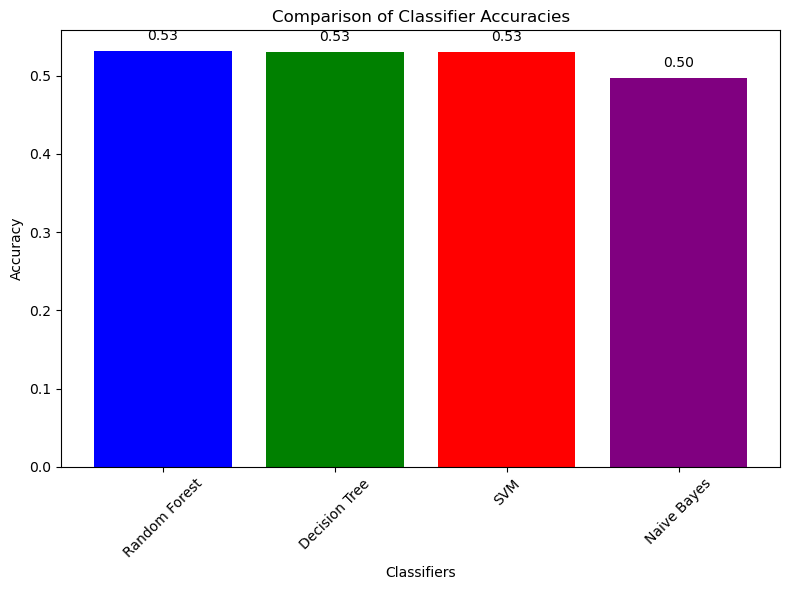

In [36]:
import matplotlib.pyplot as plt

# Collect accuracies in a dictionary
accuracies = {
    "Random Forest": accuracy_score(y_test, rf_classifier.predict(url_X_test_tfidf)),
    "Decision Tree": accuracy_dt,
    "SVM": accuracy_svm,
    "Naive Bayes": accuracy_nb,
    
}

# Extract classifier names and accuracies as separate lists
classifier_names = list(accuracies.keys())
classifier_accuracies = list(accuracies.values())

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(classifier_names, classifier_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")

# Add data labels above bars (optional)
for i, v in enumerate(classifier_accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(url_X_train_tfidf, y_train_encoded)

RandomForestRegressor(random_state=42)

In [28]:
y_pred = model.predict(url_X_test_tfidf)

# Calculate mean squared error (MSE)
accuracy = accuracy_score(y_test_encoded, y_pred.round())  # Round predictions to nearest integer
print("Accuracy:", accuracy)

Accuracy: 0.5310192837465565


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' as needed
knn_model.fit(url_X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred = knn_model.predict(url_X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4974104683195592


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
logistic_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logistic_model.fit(url_X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred = logistic_model.predict(url_X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5313498622589532


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc_model.fit(url_X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred = gbc_model.predict(url_X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5263911845730027


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
import time
start_time = time.time()
# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Custom Tokenizer (optional, replace with your implementation if needed)
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Pad sequences to a fixed length (optional, consider experimenting)
max_len = 100  # Adjust max_len as needed
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer (optional, experiment with embedding dimensions)
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(data_padded_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Extract training and validation accuracy from history
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start_time = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end_time=time.time();
test=test_end_time-test_start_time
print(f"test_time: {test:.2f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")

print("Training time: {:.2f} seconds".format(training_time))
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)  # Predict class labels

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Calculate training time


Epoch 1/10


2024-05-20 18:49:20.730490: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


227/227 [==============================] - 6s 24ms/step - loss: 0.3706 - accuracy: 0.8255 - val_loss: 0.1704 - val_accuracy: 0.9351
Epoch 2/10
227/227 [==============================] - 6s 25ms/step - loss: 0.1291 - accuracy: 0.9523 - val_loss: 0.1210 - val_accuracy: 0.9548
Epoch 3/10
227/227 [==============================] - 6s 25ms/step - loss: 0.0898 - accuracy: 0.9682 - val_loss: 0.1079 - val_accuracy: 0.9591
Epoch 4/10
227/227 [==============================] - 5s 23ms/step - loss: 0.0772 - accuracy: 0.9720 - val_loss: 0.1130 - val_accuracy: 0.9569
Epoch 5/10
227/227 [==============================] - 5s 23ms/step - loss: 0.0638 - accuracy: 0.9780 - val_loss: 0.1050 - val_accuracy: 0.9584
Epoch 6/10
227/227 [==============================] - 5s 23ms/step - loss: 0.0574 - accuracy: 0.9798 - val_loss: 0.1069 - val_accuracy: 0.9631
Epoch 7/10
227/227 [==============================] - 5s 23ms/step - loss: 0.0548 - accuracy: 0.9805 - val_loss: 0.1086 - val_accuracy: 0.9628
Epoch 8/10

In [7]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = model.predict(data_padded_test)  # Predict class labels

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))



284/284 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [17]:
loss, accuracy = model.evaluate(data_padded_test,y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.17454871535301208
Accuracy: 0.9367493391036987


284/284 [==============================] - 0s 1ms/step
Confusion Matrix:
[[4382  182]
 [ 136 4375]]


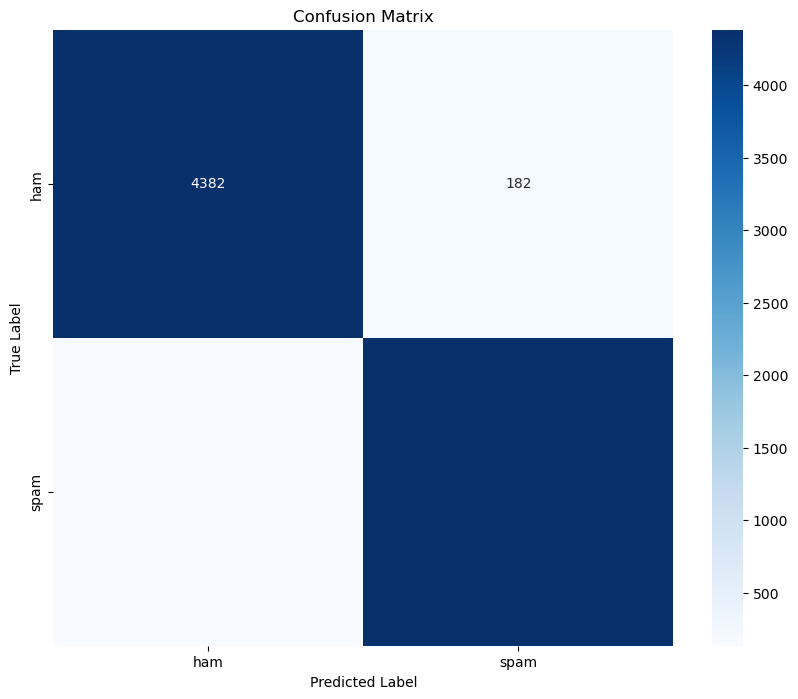

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for validation data
predictions = model.predict(data_padded_test)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


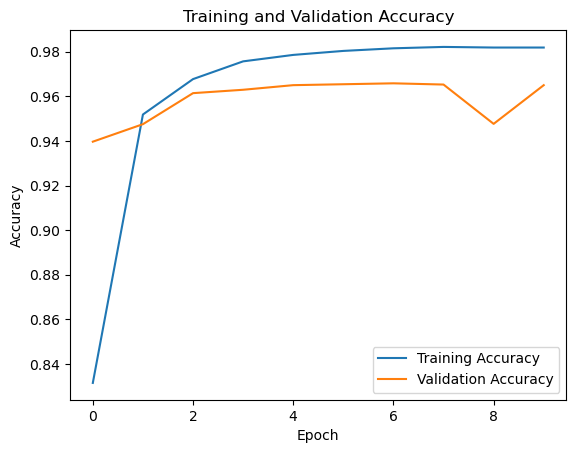

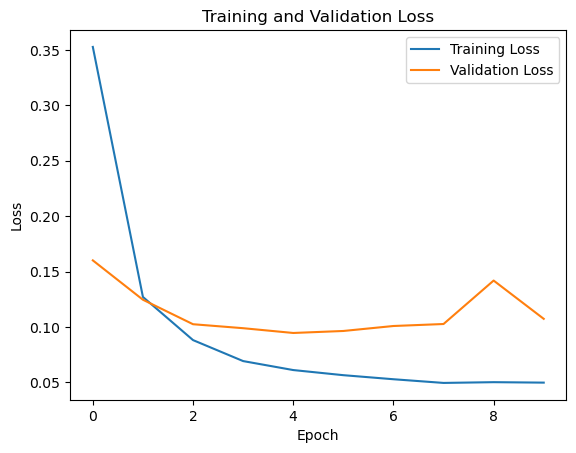

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD

import time
start_time = time.time()
# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Custom Tokenizer (optional, replace with your implementation if needed)
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Pad sequences to a fixed length (optional, consider experimenting)
max_len = 100  # Adjust max_len as needed
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer (optional, experiment with embedding dimensions)
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes


# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with SGD optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Train the model
#model.fit(url_padded, y_encoded, epochs=10, batch_size=32, validation_split=0.2)

history = model.fit(data_padded_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Extract training and validation accuracy from history

test_start=time.time()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end=time.time()
test=test_end-test_start
print(f"Test_time: {test:.2f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)  # Predict class labels

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")



Epoch 1/10
227/227 [==============================] - 2s 10ms/step - loss: 0.4397 - accuracy: 0.7866 - val_loss: 0.3070 - val_accuracy: 0.8748
Epoch 2/10
227/227 [==============================] - 2s 10ms/step - loss: 0.2770 - accuracy: 0.8902 - val_loss: 0.2688 - val_accuracy: 0.8869
Epoch 3/10
227/227 [==============================] - 2s 10ms/step - loss: 0.2402 - accuracy: 0.9042 - val_loss: 0.2313 - val_accuracy: 0.9087
Epoch 4/10
227/227 [==============================] - 2s 11ms/step - loss: 0.2156 - accuracy: 0.9155 - val_loss: 0.2061 - val_accuracy: 0.9193
Epoch 5/10
227/227 [==============================] - 2s 9ms/step - loss: 0.1912 - accuracy: 0.9258 - val_loss: 0.2004 - val_accuracy: 0.9258
Epoch 6/10
227/227 [==============================] - 2s 10ms/step - loss: 0.1806 - accuracy: 0.9301 - val_loss: 0.1851 - val_accuracy: 0.9310
Epoch 7/10
227/227 [==============================] - 2s 10ms/step - loss: 0.1735 - accuracy: 0.9333 - val_loss: 0.1941 - val_accuracy: 0.9253


In [6]:
loss, accuracy = model.evaluate(url_padded, y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)


Loss: 0.07413287460803986
Accuracy: 0.9735084772109985


284/284 [==============================] - 0s 1ms/step
Confusion Matrix:
[[4296  268]
 [ 317 4194]]


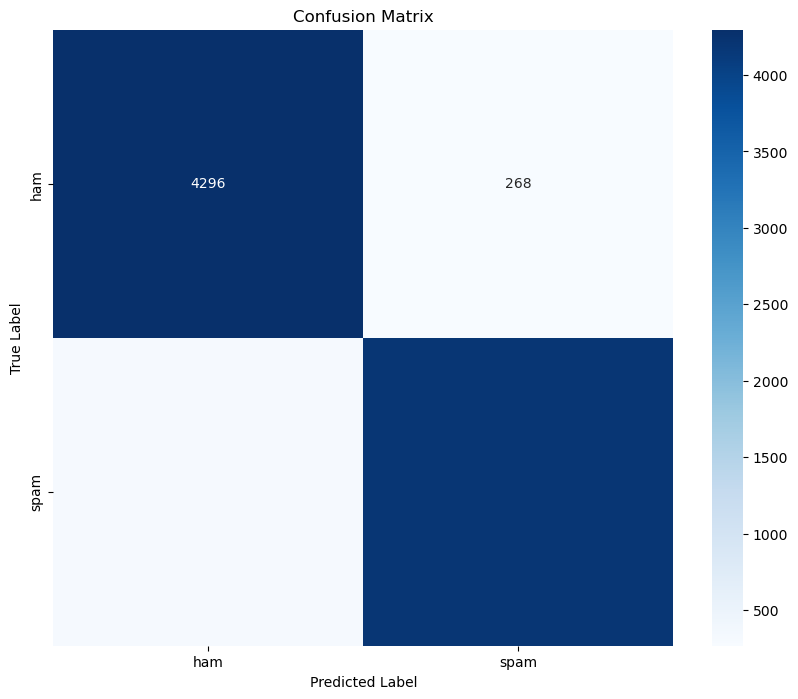

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for validation data
predictions = model.predict(data_padded_test)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


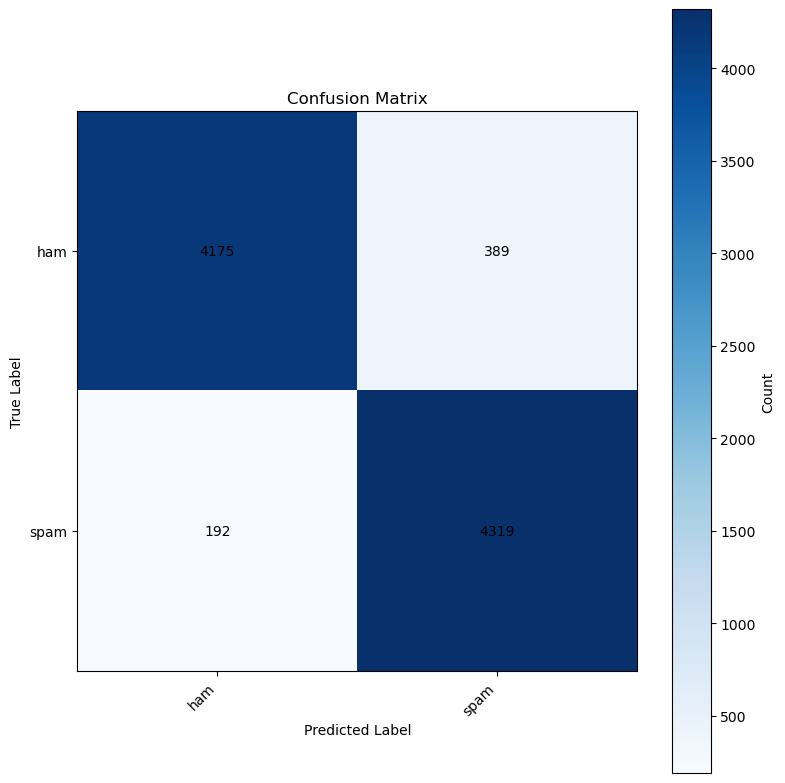

In [24]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(y_test, y_pred)

# Normalize confusion matrix (optional, consider for imbalanced classes)
# cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(label='Count')
classes = encoder.classes_  # Get the class labels
fmt = 'd'  # Format specifier for integer values in squares
plt.xticks(np.arange(len(classes)), classes, rotation=45, ha='right')
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display values in squares on the heatmap
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center", fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()

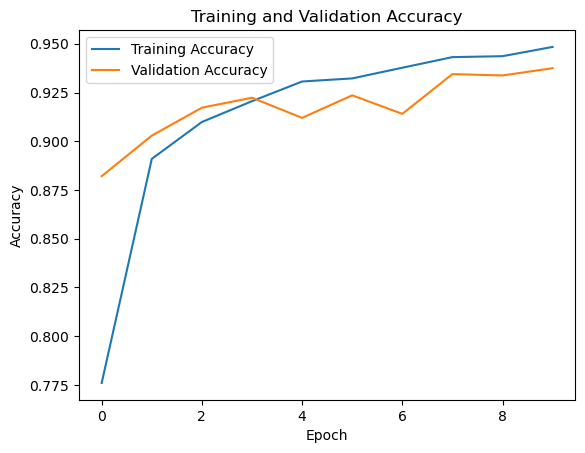

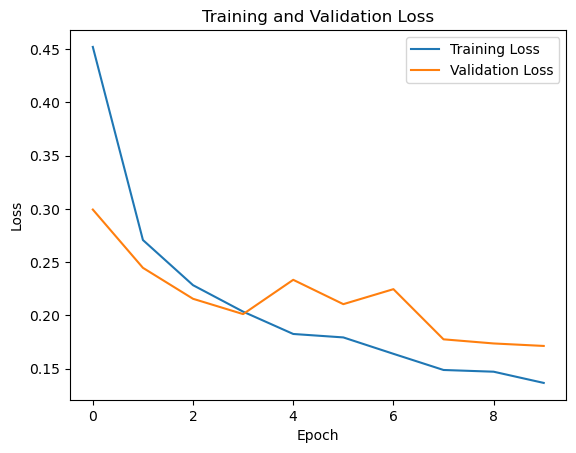

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.initializers import Constant
import numpy as np
import pandas as pd
import time

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Extract text data and labels
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Padding sequences to a fixed length
max_len = 100
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

# Splitting data into training and testing sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)

# Define the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(LSTM(128, return_sequences=True))  # First LSTM layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(LSTM(64))  # Second LSTM layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(128, activation='relu'))  # Dense layer for classification
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Test Time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 00:02:20.100758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:02:20.102775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:02:20.103135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 00:02:20.219959: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-23 00:02:20.346769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:02:20.347417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:02:20.347876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

227/227 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5052

2024-05-23 00:03:05.224091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:03:05.224784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:03:05.225281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 48s 208ms/step - loss: 0.6945 - accuracy: 0.5052 - val_loss: 0.6949 - val_accuracy: 0.4906
Epoch 2/30
227/227 [==============================] - 49s 214ms/step - loss: 0.6938 - accuracy: 0.4981 - val_loss: 0.6934 - val_accuracy: 0.4912
Epoch 3/30
227/227 [==============================] - 62s 272ms/step - loss: 0.6938 - accuracy: 0.5001 - val_loss: 0.6935 - val_accuracy: 0.4912
Epoch 4/30
227/227 [==============================] - 73s 320ms/step - loss: 0.6935 - accuracy: 0.5027 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 5/30
227/227 [==============================] - 72s 315ms/step - loss: 0.6939 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.4921
Epoch 6/30
227/227 [==============================] - 74s 328ms/step - loss: 0.6937 - accuracy: 0.4973 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 7/30
227/227 [==============================] - 78s 344ms/step - loss: 0.6935 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4

2024-05-23 00:39:29.253279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:39:29.254207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:39:29.254957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 11s 38ms/step

Overall Evaluation:
Precision (Micro): 0.5031
Recall (Micro): 0.5031
F1-Score (Micro): 0.5031
False Positive Rate (FPR): 0.4969


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import time

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')

# Extract text data and labels
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Padding sequences to a fixed length
max_len = 100
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

# Splitting data into training and testing sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)

# Define the RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(SimpleRNN(128, return_sequences=True))  # First RNN layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(SimpleRNN(64))  # Second RNN layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(128, activation='relu'))  # Dense layer for classification
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Test Time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Epoch 1/30
227/227 [==============================] - 33s 143ms/step - loss: 0.7210 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.4906
Epoch 2/30
227/227 [==============================] - 31s 136ms/step - loss: 0.6975 - accuracy: 0.4966 - val_loss: 0.6930 - val_accuracy: 0.5092
Epoch 3/30
227/227 [==============================] - 27s 120ms/step - loss: 0.6957 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.4910
Epoch 4/30
227/227 [==============================] - 27s 119ms/step - loss: 0.6961 - accuracy: 0.5029 - val_loss: 0.6947 - val_accuracy: 0.4291
Epoch 5/30
227/227 [==============================] - 36s 158ms/step - loss: 0.6901 - accuracy: 0.5406 - val_loss: 0.6863 - val_accuracy: 0.5607
Epoch 6/30
227/227 [==============================] - 31s 137ms/step - loss: 0.6945 - accuracy: 0.5237 - val_loss: 0.6666 - val_accuracy: 0.6331
Epoch 7/30
227/227 [==============================] - 39s 173ms/step - loss: 0.6934 - accuracy: 0.5291 - val_loss: 0.6932 - val_ac

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import time

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')

# Extract text data and labels
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Padding sequences to a fixed length
max_len = 100
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

# Splitting data into training and testing sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)

# Define the GRU model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(GRU(128, return_sequences=True))  # First GRU layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(GRU(64))  # Second GRU layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(128, activation='relu'))  # Dense layer for classification
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Test Time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 00:52:16.127972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:52:16.129621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:52:16.130523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 00:52:16.545653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:52:16.547286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:52:16.548389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.6957 - accuracy: 0.5037

2024-05-23 00:53:55.958992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:53:55.960083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:53:55.961572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 107s 460ms/step - loss: 0.6957 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 2/30
227/227 [==============================] - 107s 474ms/step - loss: 0.6943 - accuracy: 0.4993 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 3/30
227/227 [==============================] - 106s 468ms/step - loss: 0.6940 - accuracy: 0.4981 - val_loss: 0.6937 - val_accuracy: 0.4906
Epoch 4/30
227/227 [==============================] - 108s 475ms/step - loss: 0.6938 - accuracy: 0.5018 - val_loss: 0.6934 - val_accuracy: 0.4906
Epoch 5/30
227/227 [==============================] - 107s 473ms/step - loss: 0.6940 - accuracy: 0.4962 - val_loss: 0.6940 - val_accuracy: 0.4906
Epoch 6/30
227/227 [==============================] - 105s 464ms/step - loss: 0.6938 - accuracy: 0.4964 - val_loss: 0.6936 - val_accuracy: 0.4906
Training time: 644.34 seconds
284/284 [==============================] - 15s 53ms/step - loss: 0.6937 - accuracy: 0.4971
Test Time: 15.

2024-05-23 01:03:13.283312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:03:13.284422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:03:13.285442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 12s 42ms/step

Overall Evaluation:
Precision (Micro): 0.4971
Recall (Micro): 0.4971
F1-Score (Micro): 0.4971
False Positive Rate (FPR): 0.5029


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import time

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')

# Extract text data and labels
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Padding sequences to a fixed length
max_len = 100
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

# Splitting data into training and testing sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)

# Define the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # First Bidirectional LSTM layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Bidirectional(LSTM(64)))  # Second Bidirectional LSTM layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(128, activation='relu'))  # Dense layer for classification
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Test Time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 01:03:27.137729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:03:27.138908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:03:27.139743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 01:03:28.550930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:03:28.552514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:03:28.554002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 01:03:30.329385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:03:30.331092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:03:30.332116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.3994 - accuracy: 0.8194

2024-05-23 01:05:36.773060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:05:36.775641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:05:36.776916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 141s 603ms/step - loss: 0.3994 - accuracy: 0.8194 - val_loss: 0.3282 - val_accuracy: 0.8726
Epoch 2/30
227/227 [==============================] - 122s 539ms/step - loss: 0.2111 - accuracy: 0.9241 - val_loss: 0.1800 - val_accuracy: 0.9298
Epoch 3/30
227/227 [==============================] - 138s 609ms/step - loss: 0.1556 - accuracy: 0.9445 - val_loss: 0.1433 - val_accuracy: 0.9500
Epoch 4/30
227/227 [==============================] - 122s 539ms/step - loss: 0.1293 - accuracy: 0.9550 - val_loss: 0.1225 - val_accuracy: 0.9563
Epoch 5/30
227/227 [==============================] - 113s 496ms/step - loss: 0.1095 - accuracy: 0.9619 - val_loss: 0.1226 - val_accuracy: 0.9548
Epoch 6/30
227/227 [==============================] - 113s 496ms/step - loss: 0.0967 - accuracy: 0.9658 - val_loss: 0.1176 - val_accuracy: 0.9590
Epoch 7/30
227/227 [==============================] - 108s 474ms/step - loss: 0.0878 - accuracy: 0.9704 - val_loss: 0.1329 - val_accura

2024-05-23 01:34:54.756898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:34:54.758400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:34:54.759338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 14s 47ms/step

Overall Evaluation:
Precision (Micro): 0.9613
Recall (Micro): 0.9613
F1-Score (Micro): 0.9613
False Positive Rate (FPR): 0.0387


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import time

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')

# Extract text data and labels
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Padding sequences to a fixed length
max_len = 100
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

# Splitting data into training and testing sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)

# Define the Bidirectional GRU model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Bidirectional(GRU(128, return_sequences=True)))  # First Bidirectional GRU layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Bidirectional(GRU(64)))  # Second Bidirectional GRU layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(128, activation='relu'))  # Dense layer for classification
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Test Time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 01:35:09.954302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:35:09.955034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:35:09.955428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 01:35:10.282517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:35:10.283377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:35:10.283985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 01:35:11.578148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-23 01:35:11.778900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]


227/227 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.8182

2024-05-23 01:36:32.361417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:36:32.363035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:36:32.364132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 89s 381ms/step - loss: 0.4176 - accuracy: 0.8182 - val_loss: 0.5043 - val_accuracy: 0.7409
Epoch 2/30
227/227 [==============================] - 83s 364ms/step - loss: 0.2302 - accuracy: 0.9123 - val_loss: 0.1690 - val_accuracy: 0.9358
Epoch 3/30
227/227 [==============================] - 84s 368ms/step - loss: 0.1743 - accuracy: 0.9364 - val_loss: 0.1465 - val_accuracy: 0.9471
Epoch 4/30
227/227 [==============================] - 85s 373ms/step - loss: 0.1492 - accuracy: 0.9452 - val_loss: 0.1237 - val_accuracy: 0.9552
Epoch 5/30
227/227 [==============================] - 82s 363ms/step - loss: 0.1289 - accuracy: 0.9558 - val_loss: 0.1285 - val_accuracy: 0.9559
Epoch 6/30
227/227 [==============================] - 82s 363ms/step - loss: 0.1180 - accuracy: 0.9576 - val_loss: 0.1163 - val_accuracy: 0.9588
Epoch 7/30
227/227 [==============================] - 85s 373ms/step - loss: 0.1060 - accuracy: 0.9618 - val_loss: 0.1732 - val_accuracy: 0.9

2024-05-23 01:58:47.380420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:58:47.381645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:58:47.382526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 12s 39ms/step

Overall Evaluation:
Precision (Micro): 0.9617
Recall (Micro): 0.9617
F1-Score (Micro): 0.9617
False Positive Rate (FPR): 0.0383


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import time

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')

# Extract text data and labels
url_text = url_df['Data'].tolist()
y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(url_text)
url_sequences = tokenizer.texts_to_sequences(url_text)

# Padding sequences to a fixed length
max_len = 100
url_padded = pad_sequences(url_sequences, maxlen=max_len, padding='post')

# Splitting data into training and testing sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(url_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)

# Define the ANN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))
model.add(Flatten())  # Flatten the input from the embedding layer
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dense(256, activation='relu'))  # First fully connected layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(128, activation='relu'))  # Second fully connected layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(64, activation='relu'))  # Third fully connected layer
model.add(Dropout(0.5))  # Add Dropout for regularization
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer

# Define SGD optimizer with momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Test Time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Epoch 1/30
227/227 [==============================] - 7s 29ms/step - loss: 0.4413 - accuracy: 0.8090 - val_loss: 0.3387 - val_accuracy: 0.8770
Epoch 2/30
227/227 [==============================] - 7s 32ms/step - loss: 0.2933 - accuracy: 0.8895 - val_loss: 0.2367 - val_accuracy: 0.9052
Epoch 3/30
227/227 [==============================] - 8s 35ms/step - loss: 0.2434 - accuracy: 0.9089 - val_loss: 0.3048 - val_accuracy: 0.8609
Epoch 4/30
227/227 [==============================] - 7s 32ms/step - loss: 0.2145 - accuracy: 0.9200 - val_loss: 0.3892 - val_accuracy: 0.8083
Epoch 5/30
227/227 [==============================] - 7s 31ms/step - loss: 0.1909 - accuracy: 0.9296 - val_loss: 0.5877 - val_accuracy: 0.7645
Epoch 6/30
227/227 [==============================] - 7s 32ms/step - loss: 0.1679 - accuracy: 0.9386 - val_loss: 0.6797 - val_accuracy: 0.7537
Epoch 7/30
227/227 [==============================] - 8s 34ms/step - loss: 0.1546 - accuracy: 0.9430 - val_loss: 0.7340 - val_accuracy: 0.7675